🔥 Data loaded successfully! Let's set sail on the Titanic ML journey!

📊 Missing Values Check:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


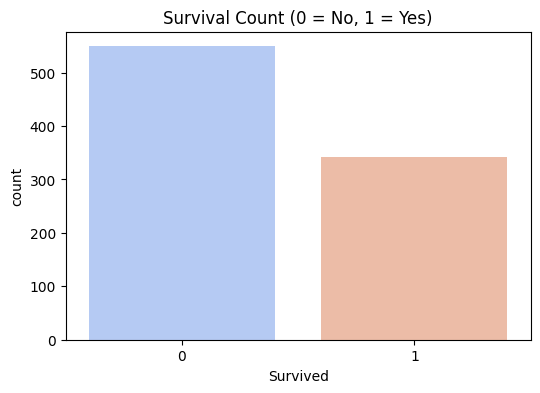

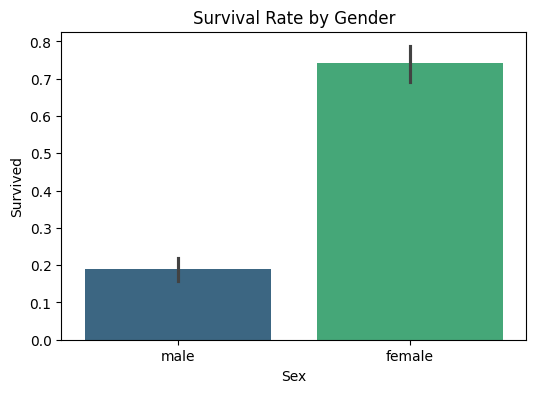

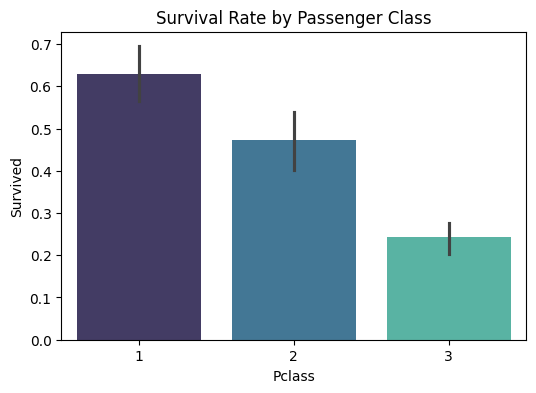


🚀 Logistic Regression Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


🚀 Random Forest Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


🚀 Gradient Boosting Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg    

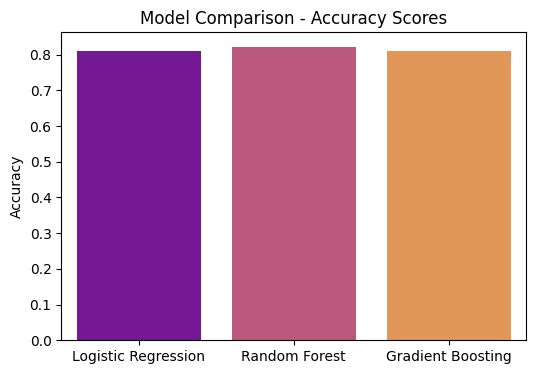


🏆 Best Model: Random Forest with Accuracy 0.8212


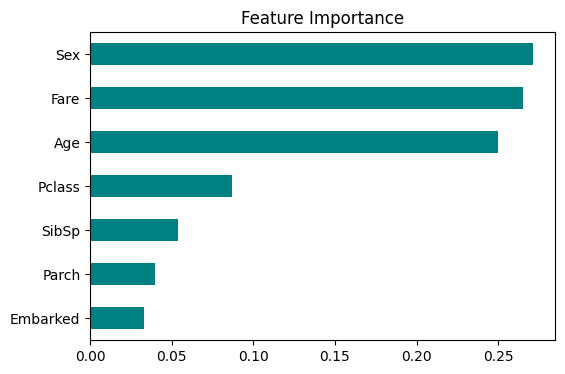


✅ Submission file 'titanic_submission.csv' created!
✨ Your ML voyage on the Titanic is complete. Full speed ahead!


In [2]:
# ================================================
# 🚢 TITANIC SURVIVAL PREDICTION - TECHY & FUN STYLE
# Author: Omii's ML Lab
# ================================================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Data
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")

print("🔥 Data loaded successfully! Let's set sail on the Titanic ML journey!")

# Step 3: Quick EDA
print("\n📊 Missing Values Check:")
print(train.isnull().sum())

plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train, palette='viridis')
plt.title("Survival Rate by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=train, palette='mako')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Step 4: Data Cleaning
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

# Step 5: Feature Selection
X = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y = train['Survived']
X_test_final = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Step 6: Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Multiple Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    results[name] = acc
    print(f"\n🚀 {name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))

# Step 8: Compare Models
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="plasma")
plt.title("Model Comparison - Accuracy Scores")
plt.ylabel("Accuracy")
plt.show()

# Step 9: Choose Best Model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n🏆 Best Model: {best_model_name} with Accuracy {results[best_model_name]:.4f}")

# Step 10: Feature Importance (for tree models)
if hasattr(best_model, "feature_importances_"):
    feat_imp = pd.Series(best_model.feature_importances_, index=X.columns)
    feat_imp.sort_values().plot(kind='barh', figsize=(6,4), color='teal')
    plt.title("Feature Importance")
    plt.show()

# Step 11: Predict on Test Set
predictions = best_model.predict(X_test_final)

# Step 12: Save Submission
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': predictions
})
submission.to_csv("titanic_submission.csv", index=False)

print("\n✅ Submission file 'titanic_submission.csv' created!")
print("✨ Your ML voyage on the Titanic is complete. Full speed ahead!")
